# Dataset Description

1. The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

2. It has four coloumns **Age,Operation year,Axil Nodes,Surv_status**


In [1]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(os.path.join(os.getcwd(),'haberman.csv'))
data.columns=["Age","Operation_year","Axil_nodes","Surv_status"] #introudcing the coloumn names in the data
data.head()

,Age,Operation_year,Axil_nodes,Surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [3]:
print("The number of rows in the dataset is",data.shape[0])
print('The number of features/columns is',data.shape[1])

The number of rows in the dataset is 305
The number of features/columns is 4


In [4]:
np.round(data.describe(),3)

,Age,Operation_year,Axil_nodes,Surv_status
count,305.000,305.000,305.000,305.000
mean,52.531,62.849,4.036,1.266
std,10.744,3.254,7.199,0.442
min,30.000,58.000,0.000,1.000
25%,44.000,60.000,0.000,1.000
50%,52.000,63.000,1.000,1.000
75%,61.000,66.000,4.000,2.000
max,83.000,69.000,52.000,2.000


### Obervations

1. Age values varies from 30-83,Operation year from 58-69(which corresponds to year 1958-1969)

2. Axil Nodes values from 0-52 and survival status as 1-2(only discreet values)

In [5]:
print(data['Surv_status'].unique())

[1 2]


In [6]:
data.isnull().any()

Age               False
Operation_year    False
Axil_nodes        False
Surv_status       False
dtype: bool

In [7]:
data.isna().any()

Age               False
Operation_year    False
Axil_nodes        False
Surv_status       False
dtype: bool

### Observation

1. Survival status holds binary values 1 for survived and 2 for died
2. The dataset is skewed with double entries for survived class
3. The dataset is not having any null or NaN entries so we need not remove any entries

# Univariate Analysis

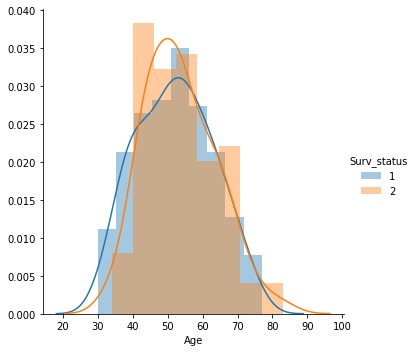

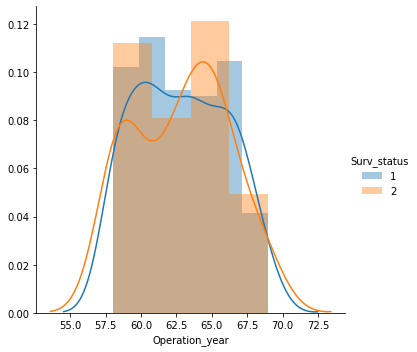

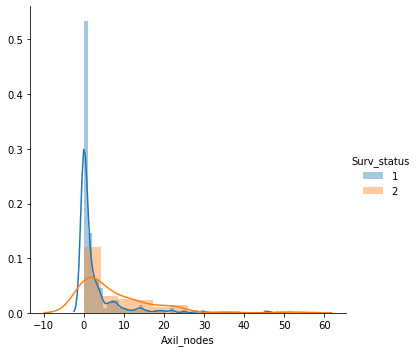

In [8]:
"""
* Distribution plots are used to visually assess how the data points are distributed with respect to its frequency.
* Usually the data points are grouped into bins and the height of the bars representing each group increases with increase in the number of data points 
lie within that group. (histogram)
* Probality Density Function (PDF) is the probabilty that the variable takes a value x. (smoothed version of the histogram)
* Kernel Density Estimate (KDE) is the way to estimate the PDF. The area under the KDE curve is 1.
* Here the height of the bar denotes the percentage of data points under the corresponding group
"""
for idx, feature in enumerate(list(data.columns)[:-1]):
    fg = sns.FacetGrid(data, hue='Surv_status', size=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

## Observations : PDF

1. Age and Operation Year is Not Skewed while Axil Nodes is highly Positively Skewed.
2. Age and Operation Year is Normally distributed while Axil Nodes is Log Normally Distributed

********* Age *********
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.04918033 0.08852459 0.15081967 0.17377049 0.18032787 0.13442623
 0.13442623 0.05901639 0.02295082 0.00655738]
CDF: [0.04918033 0.13770492 0.28852459 0.46229508 0.64262295 0.77704918
 0.91147541 0.9704918  0.99344262 1.        ]
********* Operation_year *********
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20655738 0.09180328 0.0852459  0.07540984 0.09836066 0.09836066
 0.09180328 0.09180328 0.08196721 0.07868852]
CDF: [0.20655738 0.29836066 0.38360656 0.45901639 0.55737705 0.6557377
 0.74754098 0.83934426 0.92131148 1.        ]
********* Axil_nodes *********
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.7704918  0.09836066 0.05901639 0.02622951 0.0295082  0.00655738
 0.00327869 0.         0.00327869 0.00327869]
CDF: [0.7704918  0.86885246 0.92786885 0.95409836 0.98360656 0.99016393
 0.99344262 0.99344262 0.99672131 1.        ]

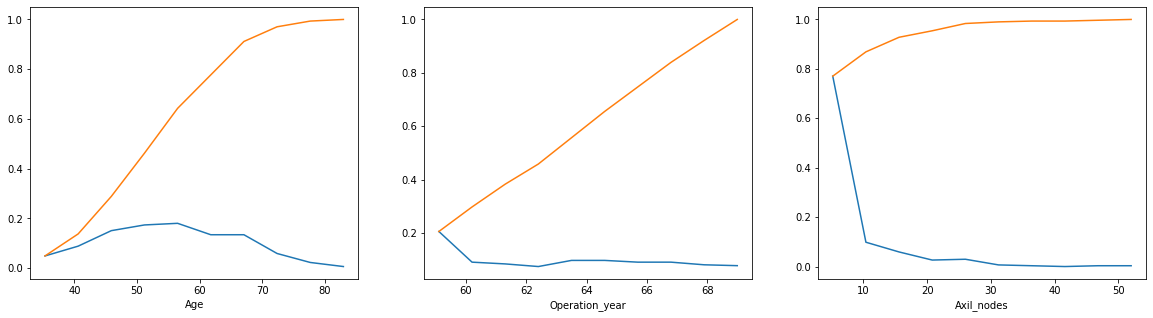

In [9]:
"""
The cumulative distribution function (cdf) is the probability that the variable takes a value less than or equal to x.
"""
plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(data.columns)[:-1]):
    plt.subplot(1, 3, idx+1)
    print("********* "+feature+" *********")
    counts, bin_edges = np.histogram(data[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:],pdf,bin_edges[1:], cdf)
#     plt.legend([pdf,cdf],['PDF','CDF'],loc=1)
    plt.xlabel(feature)

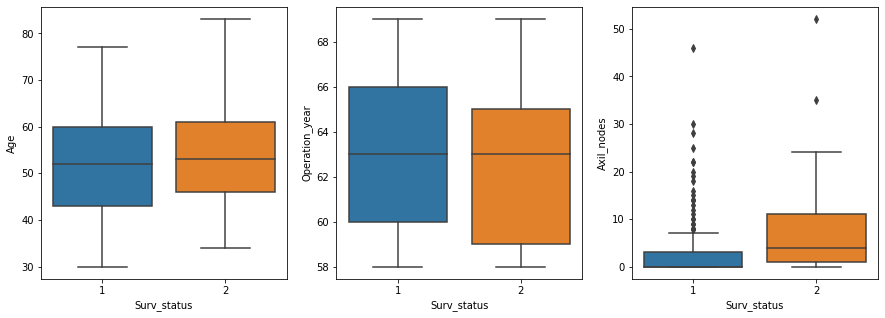

In [10]:
"""
Box plot takes a less space and visually represents the five number summary of the data points in a box. 
The outliers are displayed as points outside the box.
1. Q1 - 1.5*IQR
2. Q1 (25th percentile)
3. Q2 (50th percentile or median)
4. Q3 (75th percentile)
5. Q3 + 1.5*IQR
Inter Quartile Range = Q3 -Q1
"""
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(data.columns)[:-1]):
    sns.boxplot( x='Surv_status', y=feature, data=data, ax=axes[idx])
plt.show()  

## Observations

1. We observe the presence of many outliers in the Axil Nodes Coloumn 
2. The IQR Range for Age is 45-60(approx) and for Operation year is 60-66(approx) and for Axil Nodes is 0-5

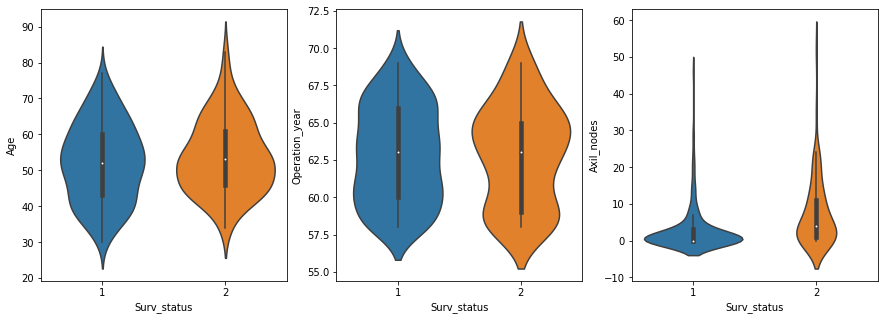

In [11]:
"""
Violin plot is the combination of box plot and probability density function.
"""
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(data.columns)[:-1]):
    sns.violinplot( x='Surv_status', y=feature, data=data, ax=axes[idx])
plt.show()

## Observations

1. We observe that Violin plot are Flatter in the IQR(Q3-Q1) range and thinner in the region of the outliers as with Axil Nodes

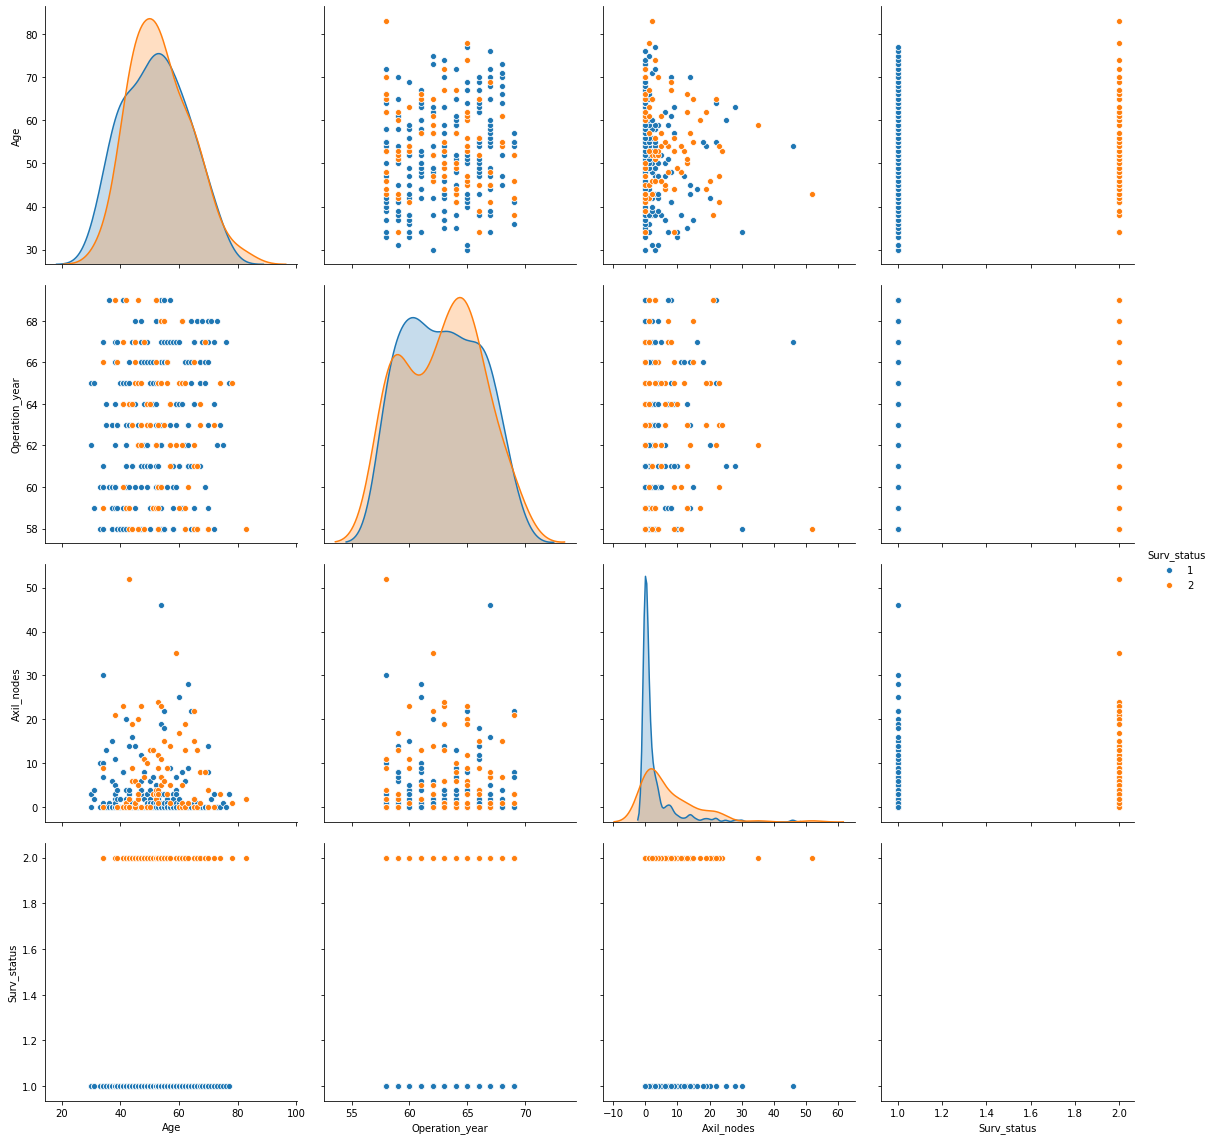

In [12]:
# pair plot
"""
Pair plot in seaborn plots the scatter plot between every two data columns in a given dataframe.
It is used to visualize the relationship between two variables
"""
# data = data.loc[:,:-1]
sns.pairplot(data, hue='Surv_status', size=4)
# plt.scatter(data.iloc[:,:-1],data[:,-1],size=4)
# grr = pd.plottting.scatter_matrix(data, c=Y, figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.show()

## Observations

1. Age and Operation Year are two most important variables found for classification